In [18]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

import spikeextractors as se
import spikewidgets as sw
import spiketoolkit as st
import os, sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Create a toy example dataset
recording, sorting_true=sw.example_datasets.toy_example1(duration=60)

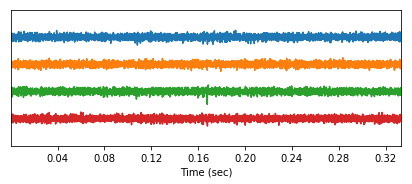

In [20]:
# View the filtered timeseries data
filt=st.filters.bandpass_filter(recording,freq_min=300,freq_max=6000)
sw.TimeseriesWidget(recording=filt,width=7,height=2.5).display()

In [7]:
# Create a temporary working directory if needed
if not os.path.exists('tmp'): os.mkdir('tmp')

In [8]:
# Mountainsort4 spike sorting
sorting_MS4=st.sorters.mountainsort4(
    recording=recording,
    detect_sign=-1,
    adjacency_radius=-1
)

Using tmpdir: /tmp/tmp7wa0jph9
Preparing /tmp/tmp7wa0jph9/timeseries.hdf5...
Preparing neighborhood sorters (M=4, N=1800000)...
Detecting events on channel 1 (phase1)...
Num events detected on channel 1 (phase1): 1554
Computing PCA features for channel 1 (phase1)...
Clustering for channel 1 (phase1)...
Found 6 clusters for channel 1 (phase1)...
Computing templates for channel 1 (phase1)...
Re-assigning events for channel 1 (phase1)...
Detecting events on channel 2 (phase1)...
Num events detected on channel 2 (phase1): 1157
Computing PCA features for channel 2 (phase1)...
Clustering for channel 2 (phase1)...
Found 9 clusters for channel 2 (phase1)...
Computing templates for channel 2 (phase1)...
Re-assigning events for channel 2 (phase1)...
Detecting events on channel 3 (phase1)...
Num events detected on channel 3 (phase1): 821
Computing PCA features for channel 3 (phase1)...
Clustering for channel 3 (phase1)...
Found 7 clusters for channel 3 (phase1)...
Computing templates for channel 

In [ ]:
# SpyKING Circus spike sorting
sorting_SC=st.sorters.spyking_circus(
    recording=recording,
    adjacency_radius=50,
    detect_sign=-1,
    output_folder='tmp',
)

In [ ]:
# KiloSort spike sorting (KILOSORT_PATH and NPY_MATLAB_PATH can be set as environment variables)
sorting_KS=st.sorters.kilosort(
    recording=recording,
    output_folder='tmp',
    kilosort_path='../../KiloSort/',
    npy_matlab_path='../../../npy-matlab/'
)

In [ ]:
# Klusta spike sorting
sorting_KL=st.sorters.klusta(
        recording, # The recording extractor
        output_folder='tmp',
        )

In [ ]:
# IronClust spike sorting (IRONCLUST_PATH can be set as environment variables)
sorting_IC=st.sorters.ironclust(
    recording=recording,
    detect_sign=-1,
    adjacency_radius=-1,
    prm_template_name='tetrode_template.prm',
    ironclust_path='../../ironclust',
    tmpdir='tmp',
)

In [ ]:
sorting_true.getUnitIds()

In [9]:
# Compute SNRs of true units
snrs=st.computeUnitSNR(recording=filt, sorting=sorting_true, unit_ids=sorting_true.getUnitIds(), max_num_waveforms=100)
sorting_true.setUnitsProperty(property_name='SNR',values=snrs)

Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100
Waveform 1/1 - Number of waveforms:  100


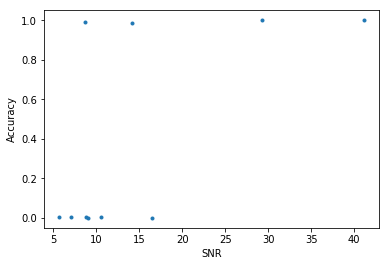

In [10]:
# Comparison MountainSort4 vs truth
comparison_MS4=st.comparison.SortingComparison(sorting_true,sorting_MS4)
sw.SortingAccuracyWidget(sorting_comparison=comparison_MS4, property_name='SNR').plot()

In [ ]:
# Comparison KiloSort vs truth
comparison_KS=st.comparison.SortingComparison(sorting_true,sorting_KS)
sw.SortingAccuracyWidget(sorting_comparison=comparison_KS, property_name='SNR').plot()

In [ ]:
# Comparison SpyKING Circus vs truth
comparison_SC=st.comparison.SortingComparison(sorting_true,sorting_SC)
sw.SortingAccuracyWidget(sorting_comparison=comparison_SC, property_name='SNR').plot()

In [ ]:
# Comparison Klusta vs truth
comparison_KL=st.comparison.SortingComparison(sorting_true,sorting_KL)
sw.SortingAccuracyWidget(sorting_comparison=comparison_KL, property_name='SNR').plot()

In [ ]:
# Comparison IronClust vs truth
comparison_IC=st.comparison.SortingComparison(sorting_true,sorting_IC)
sw.SortingAccuracyWidget(sorting_comparison=comparison_IC, property_name='SNR').plot()

In [12]:
sw.SortingComparisonTable(comparison_MS4).display()

Unit ID,Accuracy,Best unit,Matched unit,f.n.,f.p.,# matches
1,0.99,2,2,0.00,0.01,137
2,0.99,3,3,0.01,0.00,142
3,0.00,3,-1,0.99,0.99,1
4,0.00,-1,-1,0.00,0.00,0
5,0.00,15,-1,0.99,0.99,1
6,0.00,-1,-1,0.00,0.00,0
7,1.00,10,10,0.00,0.00,146
8,0.00,2,-1,0.99,0.99,1
9,0.00,2,-1,0.99,0.99,1
10,1.00,15,15,0.00,0.00,144


In [13]:
sw.SortingComparisonTable(comparison_KS).display()

NameError: name 'comparison_KS' is not defined

In [ ]:
sw.SortingComparisonTable(comparison_SC).display()

In [ ]:
sw.SortingComparisonTable(comparison_KL).display()

In [ ]:
sw.SortingComparisonTable(comparison_IC).display()

In [ ]:
comparison_KL.plotConfusionMatrix()

In [ ]:
# You can use Phy to manually curate the sorting output of any spike sorter
st.exportToPhy(recording, sorting_MS4, output_folder='mountainsort')

In [ ]:
sorting_M4_curated = si.PhysortingExtractor('mountainsort/')